# Proyecto del sprint 13
La compañía __Model Fitness__ necesita analizar sus datos para saber cómo actuar ante la pérdida de clientes. En este proyecto vamos a predecir la probabilidad de pérdida para cada cliente en el mes siguiente, clasificar a los usuarios mediante _clustering_ y analizar los factores que más impactan la pérdida de clientes. Al final de este análisis compartiré instrucciones básicas para mejorar la estrategia de interacción y retención de clientes con base en las características de mayor peso.

Comenzaremos con el análisis exploratorio o EDA (por sus siglas en ingles: _exploratory data analysis_).

## Análisis exploratorio de datos
Importemos el DataFrame y comencemos a conocerlo.

In [1]:
# Importación de Pandas.
import pandas as pd

# Carga e impresión del DataFrame.
df = pd.read_csv('/datasets/gym_churn_us.csv')
display(df.head())

# ¿Hay datos nulos en la columnas?
print()
df.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   floa

La mayoría de las variables son categóricas.

Afortunadamente el DataFrame no tiene datos nulos. Esta compuesto por valores de tipo `float64` e `int64`; es decir, números con punto decimal y números enteros. Como nos vamos a concentrar en _machine learning_ vamos a pasar todos los datos a flotantes, pero eso será después del análisis exploratorio, con los algoritmos que utilicemos.

Para tener una mayor legibilidad al trabajar con la tabla correré un pequeño script para que las columnas sigan la convención _snake_case_.

In [2]:
#Pequeño ciclo for para seguir la convención 'snake_case'. 
snake_case_columns = []
for column in df.columns:
    column = column.lower().strip()
    snake_case_columns.append(column)
df.columns = snake_case_columns

# Comprobación
print(f'Así quedan las columnas después de ajustarlas: \n\n {df.columns}')
print()

Así quedan las columnas después de ajustarlas: 

 Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')



Ahora que las columnas lucen y se entienden mejor, continuaremos analizando los datos a nivel más estadístico.

In [3]:
print(df.describe())

            gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

Como es de esperarse en un DataFrame con columnas de datos booleanos (categóricas), los promedios y desviaciones son cercanas a 0.5, pero hay muchas columnas donde no es así. Comenzamos a comprender mejor columnas que indican si el cliente vive cerca del gimnasio, si llegó gracias a otro cliente o si participa en sesiones grupales. Será interesante descubrir cuáles características tienen un mayor peso en la permanencia y abandono de los clientes.

Identifiquemos cuántos usuarios se han ido y comparemos los promedios para las personas que cancelaron su suscripción y las que no.

In [4]:
# ¿Cuánto usuarios se han ido?
print(df['churn'].value_counts())
print()

# Promedios para los diferentes tipos de usuarios.
grouped_by_churn = df.groupby('churn').mean().reset_index()
display(grouped_by_churn)

0    2939
1    1061
Name: churn, dtype: int64



,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Básicamente se han ido una tercera parte de los usuarios. Hay columnas que no parecen tener mucha influencia porque sus promedios no tienen diferencias significativas en ambos grupos como el género o la edad, pero hay diferencias marcadadas en los promedios de los cargos adicionales, la frecuencia de visitas semanales en el mes y en total, etc.

Vamos a conocer mejor las distribuciones con algunos gráficos para empezar a desarrollar algunas hipótesis. Primero nos vamos a concentrar en las variables numéricas: `age`, `lifetime`, `contract_period`, `month_to_end_contract`, `avg_class_frequency_total`, `avg_class_frequency_current_month` y `avg_additional_charges_total`.

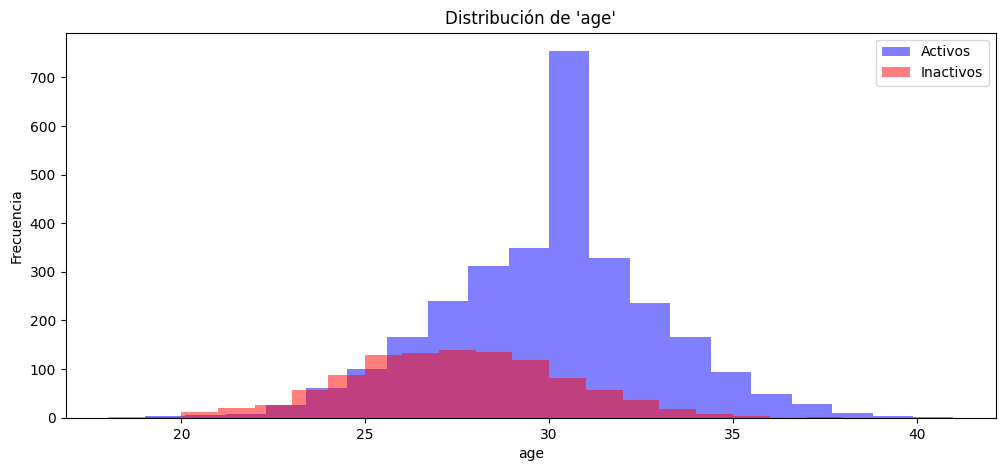

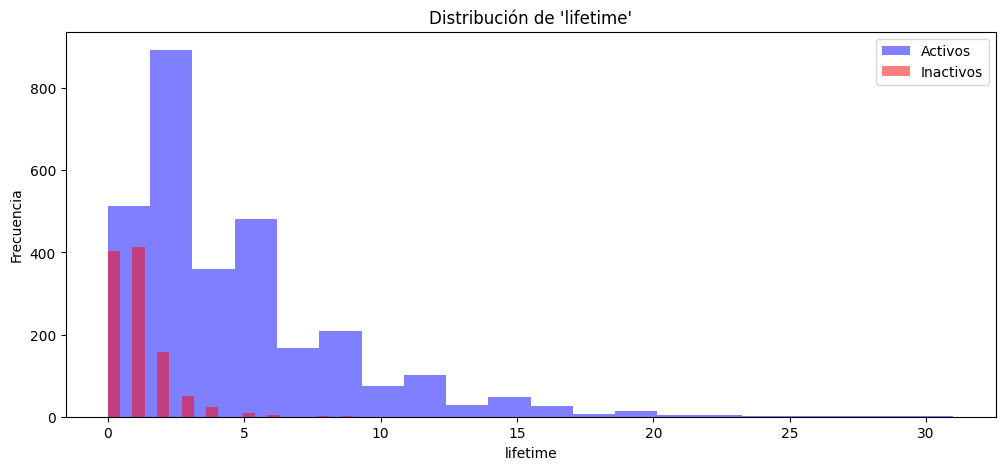

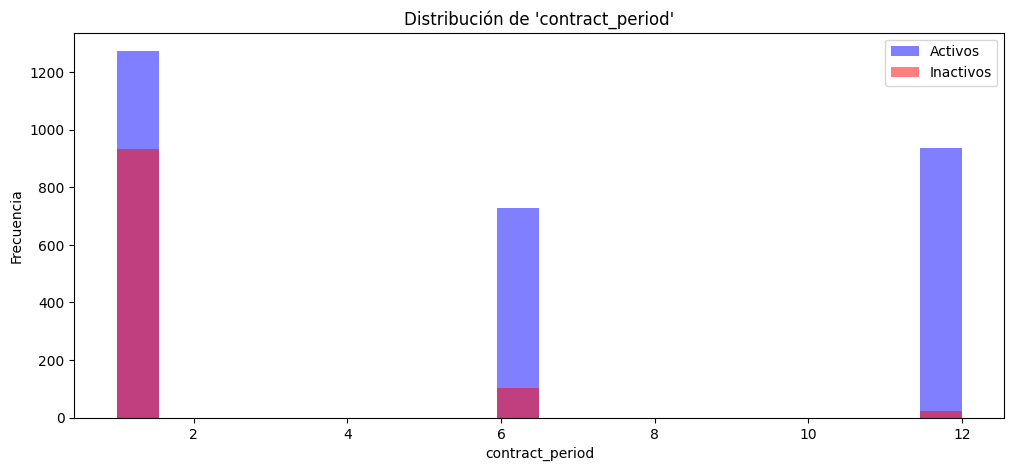

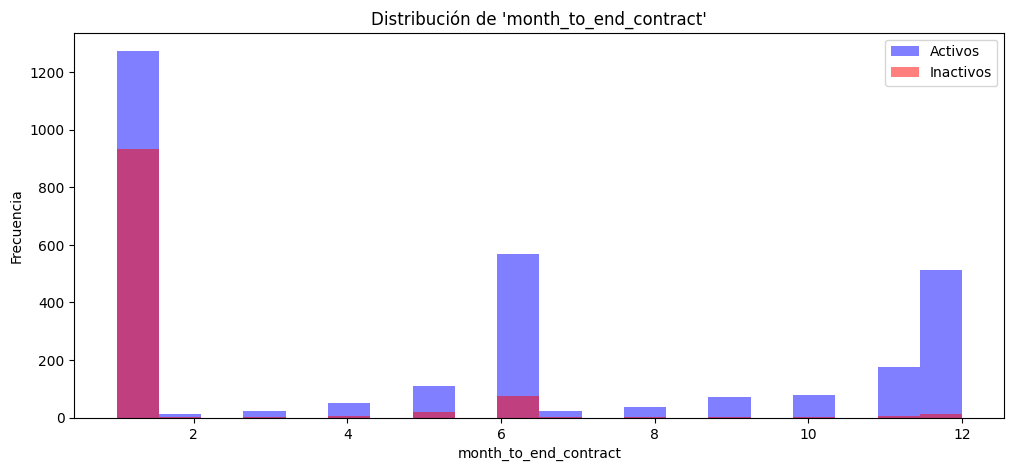

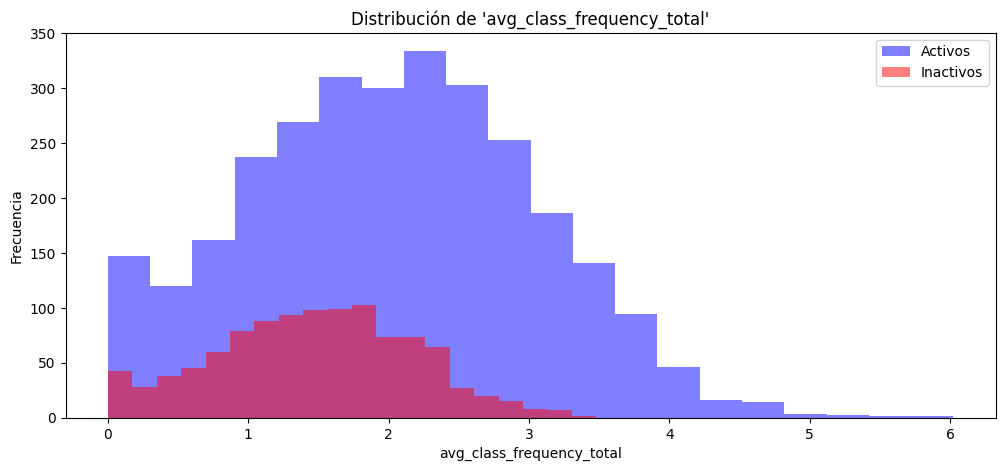

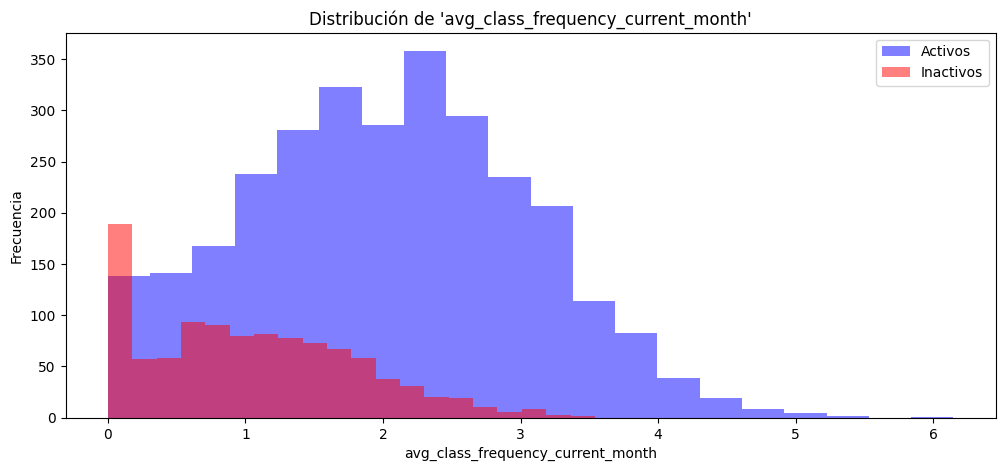

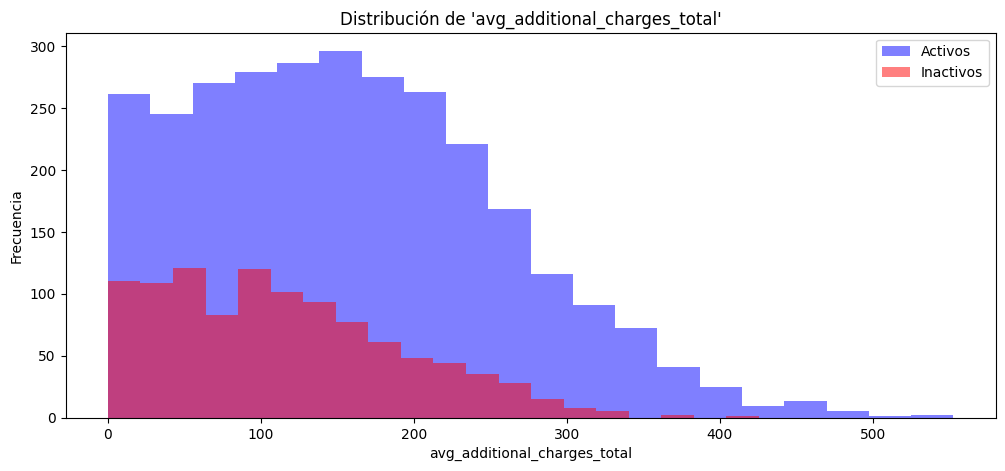

In [5]:
import matplotlib.pyplot as plt

# Columnas numéricas
numeric_columns = ['age', 'lifetime', 'contract_period', 'month_to_end_contract', 
                   'avg_class_frequency_total', 'avg_class_frequency_current_month', 
                   'avg_additional_charges_total']

# Histograma para cada columna
for column in numeric_columns:
    plt.figure(figsize=(12, 5))
    
    plt.hist(df[df['churn'] == 0][column].dropna(), bins=20, alpha=0.5, label='Activos', color='blue')
    plt.hist(df[df['churn'] == 1][column].dropna(), bins=20, alpha=0.5, label='Inactivos', color='red')
    
    plt.title(f"Distribución de '{column}'")
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()


No hay una diferencia tan grande entre usuarios que se han ido y se han quedado en características como la edad, pero sí parece haber diferencias considerables en otras categorías.

Grafiquemos ahora las varibles categóricas.

<Figure size 1200x500 with 0 Axes>

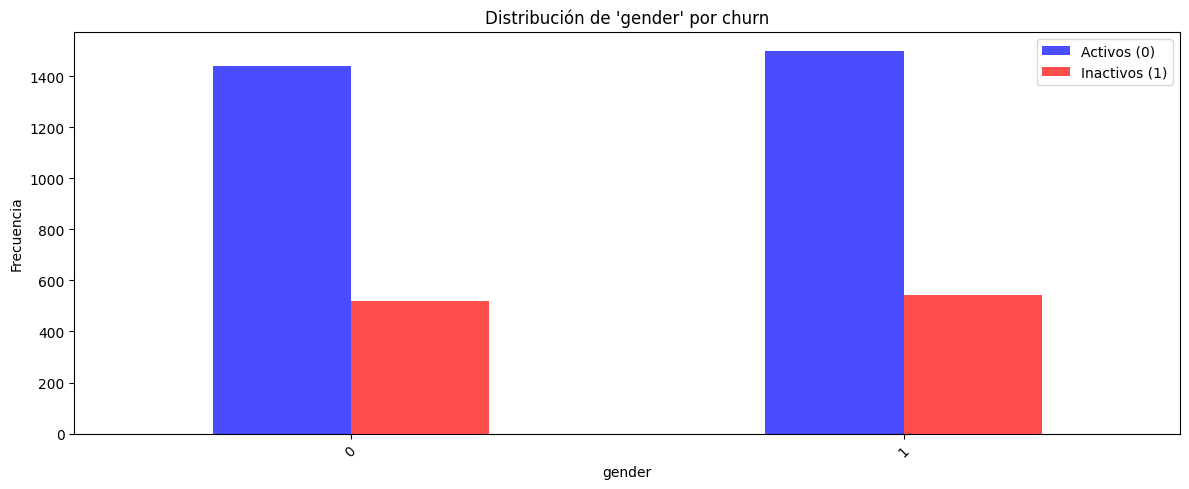

<Figure size 1200x500 with 0 Axes>

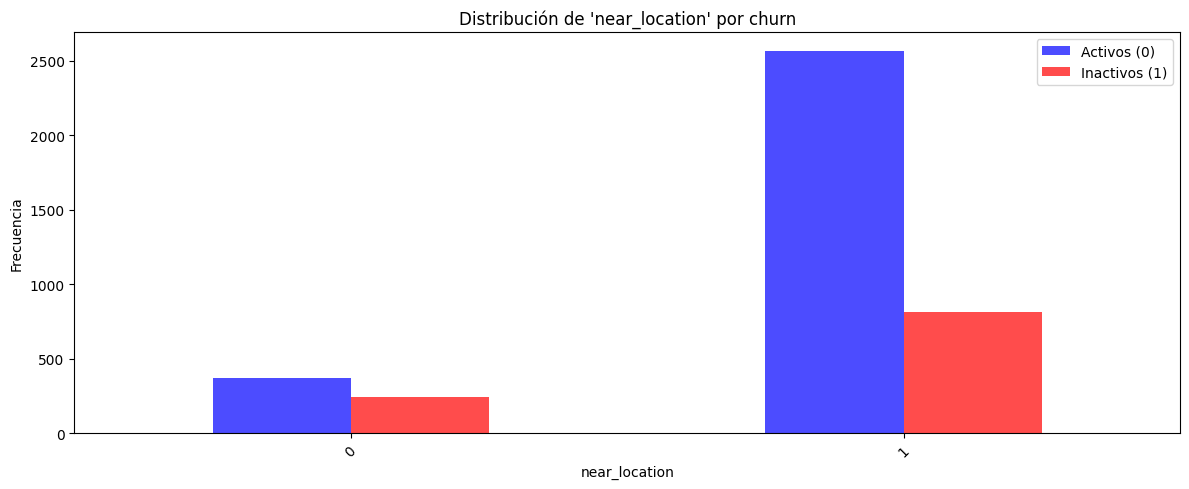

<Figure size 1200x500 with 0 Axes>

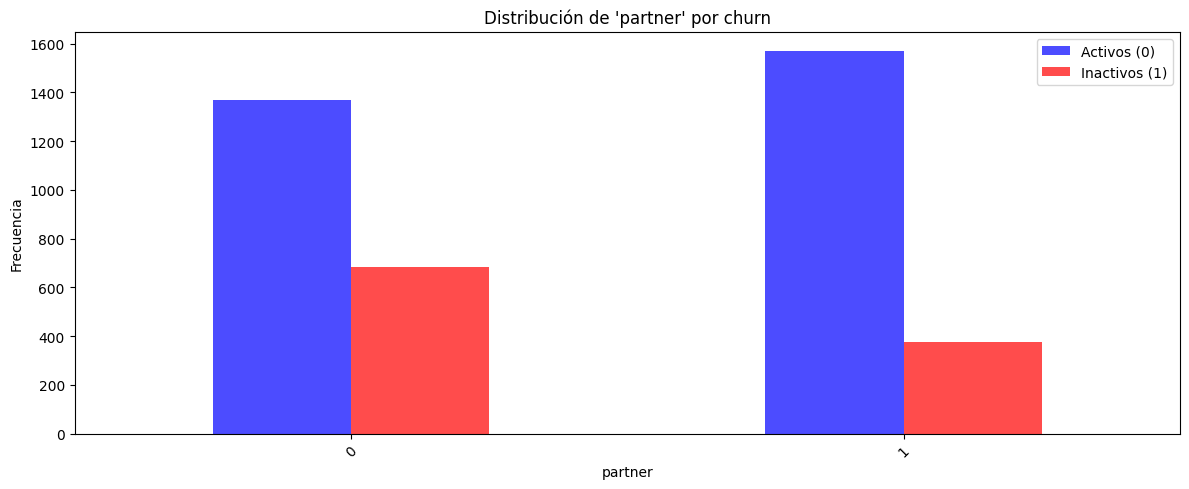

<Figure size 1200x500 with 0 Axes>

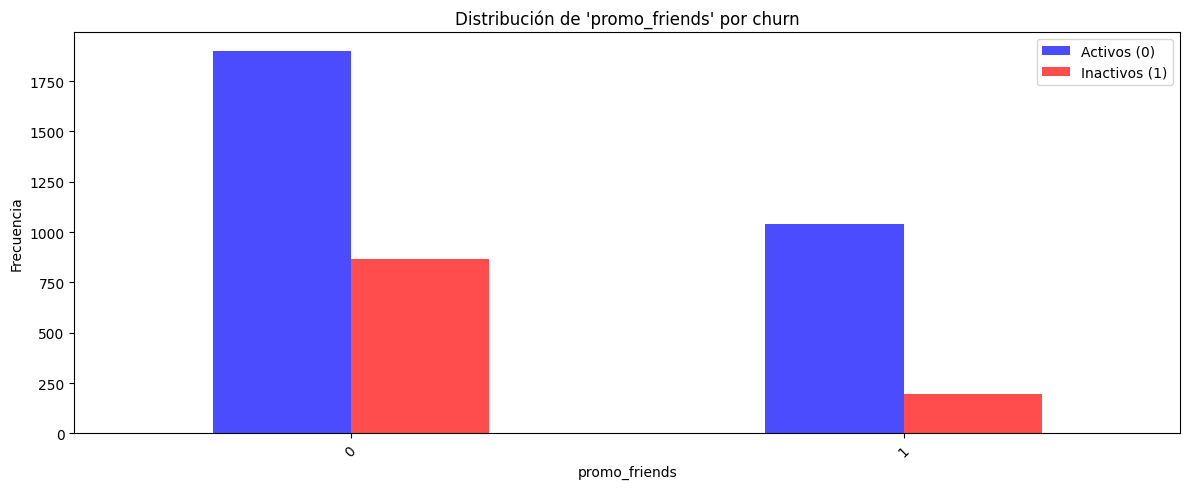

<Figure size 1200x500 with 0 Axes>

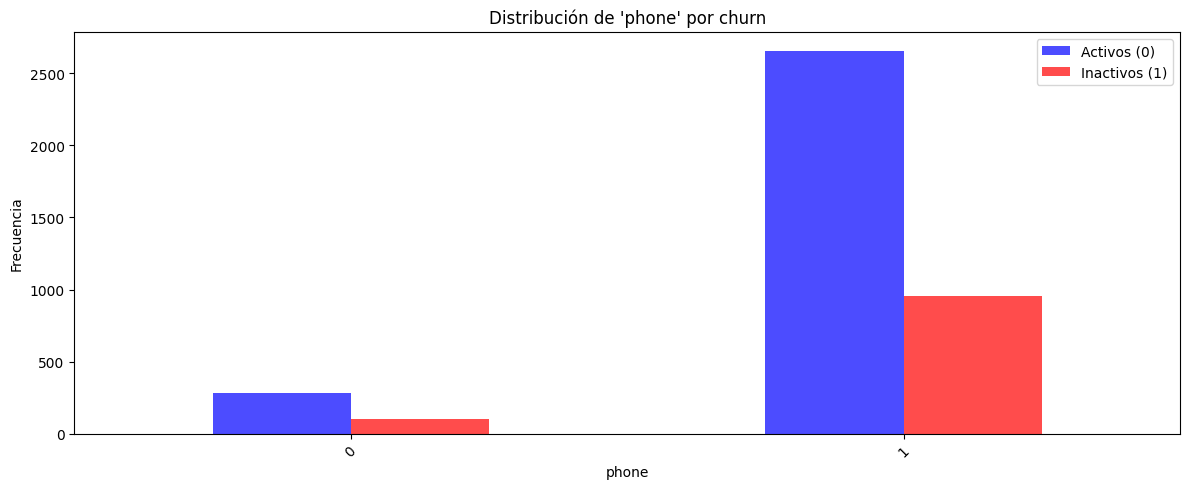

<Figure size 1200x500 with 0 Axes>

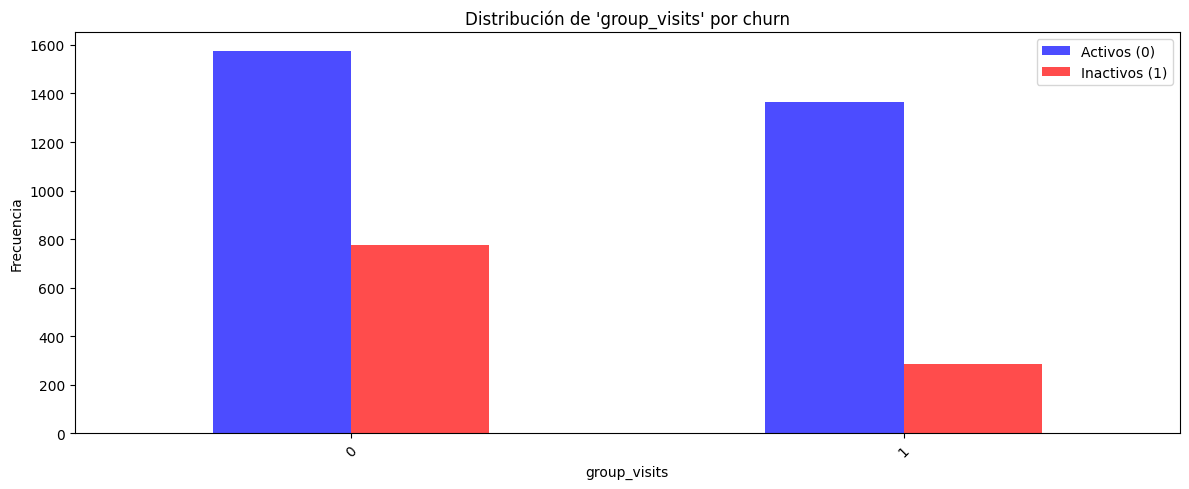

In [6]:
import matplotlib.pyplot as plt

categorical_columns = ['gender', 'near_location', 'partner', 'promo_friends', 
                       'phone', 'group_visits']

for column in categorical_columns:
    plt.figure(figsize=(12, 5))
    
    # Tabla de frecuencias cruzadas
    freq_table = df.groupby([column, 'churn']).size().unstack(fill_value=0)
    
    # Gráfico de barras agrupadas
    freq_table.plot(kind='bar', figsize=(12, 5), alpha=0.7, color = ['blue', 'red'])
    
    plt.title(f"Distribución de '{column}' por churn")
    plt.ylabel('Frecuencia')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.legend(['Activos (0)', 'Inactivos (1)'])
    plt.tight_layout()
    plt.show()



Las variables categóricas muestran  que las visitas en grupos, las inscripciones mediante amigos, etc., podrían tener influencia en que el usuario cancele la suscripción. Para finalizar nuestro análisis exploratorio, analizaremos la matriz de correlación para comenzar a identificar multicolinealidad entre las características y que características se correlacionan con la variable objetivo (`'churn'`).

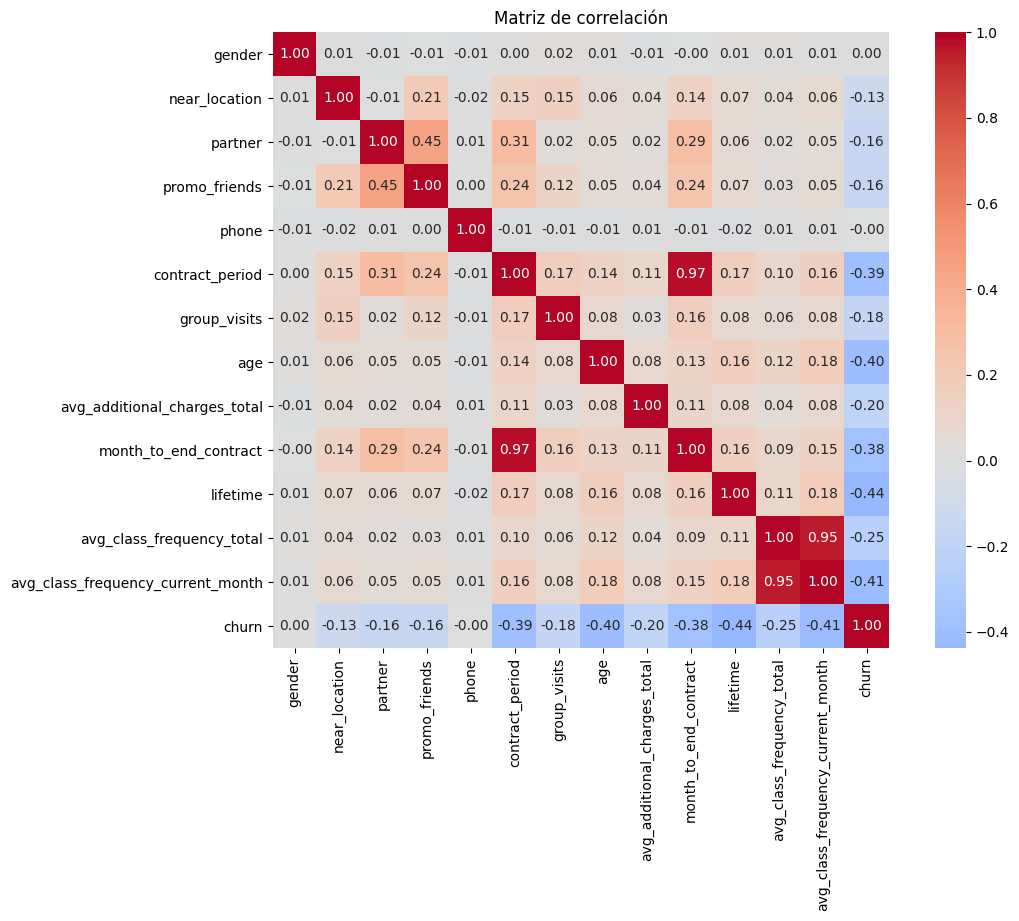

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           
            cmap='coolwarm',      
            center=0,             
            square=True,          
            fmt='.2f')            
plt.title('Matriz de correlación')
plt.show()

Como era de esperarse las características que indican datos similares tienen una alta correlación. Por ejemplo, los datos de las frecuencias de visita a nivel mensual y total están altamente correlacionadas. El abandono, a diferencia de lo que parecía con las gráficas anteriores, sí podría estar correlacionado con la edad; parece que los clientes más jóvenes abandonan más. Hasta el momento éstas son simples hipótesis.

## Construir un modelo para predecir la cancelación de usuarios
Construiremos un modelo de __clasificación binaria__. Haremos entrenamiento con dos métodos: la __regresión logística__ y el __bosque aleatorio__. Como decíamos, nuestra variable objetivo es el __abandono__ (`'churn'`) del mes siguiente.

Como nuestro modelo predice el abandono, la estadística en la que nos vamos a concentrar es el _recall_.

Comencemos importando las librerías necesarias y haciendo la división de nuestros datos en conjuntos de entrenamiento y validación.

In [8]:
# Importamos la función para dividir los datos.
from sklearn.model_selection import train_test_split

# Aquí tenemos los modelos.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importamos las métricas.
from sklearn.metrics import accuracy_score, precision_score, recall_score

# define la función que podrá generar nuestras métricas
def print_all_metrics(y_true, y_pred, title = 'Métricas de clasificación'):
    print(title)
    print('\tAccuracy: (exactitud) {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision (precisión): {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall (sensibilidad): {:.2f}'.format(recall_score(y_true, y_pred)))
    print()

# Importamos el escalador.
from sklearn.preprocessing import StandardScaler

# Dividimos entre características y variable objetivo.
X = df.drop('churn', axis = 1)
y = df['churn']

# División de los datos en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Entrenamos el StandardScaler() en el conjunto de entrenamiento.
scaler = StandardScaler()
scaler.fit(X_train)

# Transformamos conjuntos de entrenamiento y de prueba.
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Empecemos con el modelo de regresión lógistica.
lr_model = LogisticRegression(random_state=0)
# Entrenamiento. 
lr_model.fit(X_train_st, y_train)
# Previsiones con el modelo entrenado.
lr_predictions = lr_model.predict(X_test_st)
# Impresión de las métricas.
print_all_metrics(y_test, lr_predictions, title='Métricas de regresión logística:')

# define el algoritmo para el nuevo modelo de random forest.
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# Entrenamiento.
rf_model.fit(X_train, y_train)
# Previsiones con el modelo entrenado.
rf_predictions = rf_model.predict(X_test)
# Impresión de las métricas.
print_all_metrics(y_test, rf_predictions, title = 'Métricas de random forest:')


Métricas de regresión logística:
	Accuracy: (exactitud) 0.92
	Precision (precisión): 0.87
	Recall (sensibilidad): 0.78

Métricas de random forest:
	Accuracy: (exactitud) 0.92
	Precision (precisión): 0.86
	Recall (sensibilidad): 0.80



Como decíamos,  nos vamos a concentrar es el _recall_. ¿Por qué? Porque queremos disminuir el abandono de clientes y estamos dispuestos a sacrificar un poco de _precision_. __El clasificador _random forest_ es mejor para nuestros objetivos__. Tiene un mayor _recall_, y casi similares _accuracy_ y _precision_ que el clasificador de regresión logística.

Recordemos que _recall_ o sensibilidad mide cuántos positivos reales detecta el modelo. Un _recall_ alto es sinónimo de pocos falsos negativos. Así nos aseguramos de perder una cantidad menor de usuarios no identificados como posibles pérdidas.

Veamos las importancias de los variables en el modelo clasificador de nuestro bosque aleatorio.

In [9]:
rf_importance = (
    pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    })
    .sort_values('importance', ascending=False)
)

print(rf_importance.head(15))


                              feature  importance
10                           lifetime    0.274971
12  avg_class_frequency_current_month    0.174615
11          avg_class_frequency_total    0.130886
7                                 age    0.126086
8        avg_additional_charges_total    0.084610
9               month_to_end_contract    0.075335
5                     contract_period    0.068043
6                        group_visits    0.015151
3                       promo_friends    0.011386
2                             partner    0.011376
0                              gender    0.010653
1                       near_location    0.010426
4                               phone    0.006461


Como podemos ver, según la importancia de las características del método `RandomForestClassifier` la característica `'lifetime'` (el tiempo en meses desde que el usuario llegó al gimnasio) fue la de mayor peso. Le siguen las frecuencias de visita mensuales y semanales, la edad (que al principio no me parecía influyente) y los gastos adicionales a la suscripción.

Variables como si el usuario dio un teléfono, su género y la cercanía con el gimnasio no tuvieron mucha importancia en nuestro modelo.

A continuación desarrollaremos grupos de usuarios con aprendizaje no supervisado, es decir, _clustering_.

## Crear _clusters_ de usuarios

Vamos a descubrir las características clave de los grupos de usuarios con el método `KMeans()`, pero antes de eso crearemos una matriz de distancia con la función `linkage()`.

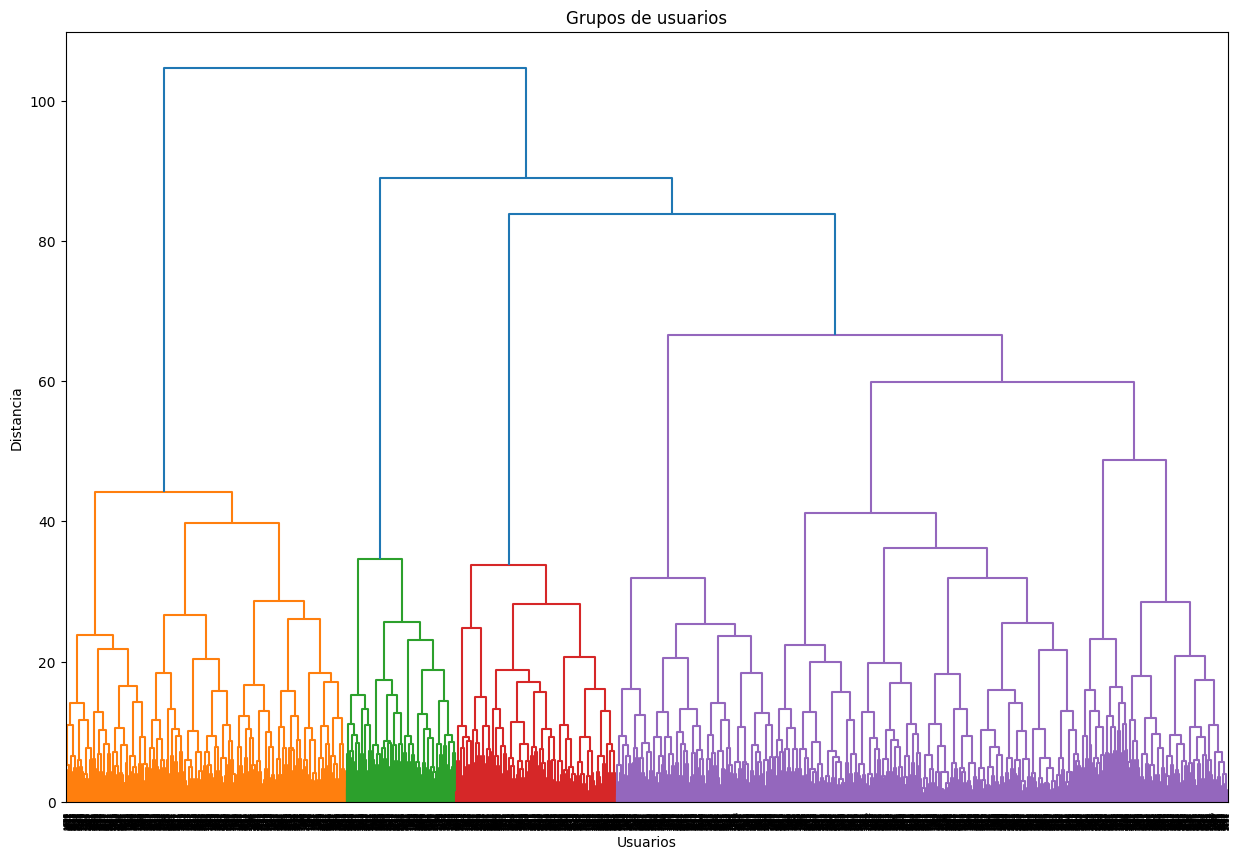

In [10]:
# Dendograma.
from scipy.cluster.hierarchy import dendrogram, linkage

# Estandarización de los datos y ward.
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method='ward')

# Dendrograma
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Grupos de usuarios')
plt.xlabel('Usuarios')
plt.ylabel('Distancia')
plt.show()


Dependiendo de donde se trace la línea horizontal, podríamos tener cuatro o cinco _clusters_. Con base en esta información entrenaremos nuestro algoritmo `KMeans`, el cual tendrá 5 _clusters_. 

In [11]:
# Importamos Kmeans.
from sklearn.cluster import KMeans

# Escalado de datos obligatorio, una vez más.
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Definimos el modelo.
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)

# Almacenamos las etiquetas del 'clustering'.
df['cluster_km'] = labels

# obtiene las estadísticas de los valores medios de las características por clúster
df_cluster_labels = df.groupby(['cluster_km']).mean().sort_values(by = 'churn', ascending = False)

Ya tenemos los valores medios en una tabla. Vamos a analizarla para comenzar a perfilar los _clusters_. Además de la tabla, nos apoyaremos de unas gráficas de las características más importantes.

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,churn_rate
0,2,0.485921,1.000000,0.353982,0.240547,1.0,1.958970,0.341110,28.156074,130.755211,1.868866,2.378117,1.237040,1.000010,0.518906,51.890587
1,3,0.497041,0.000000,0.461538,0.078895,1.0,2.378698,0.218935,28.479290,135.631940,2.224852,2.812623,1.662253,1.480228,0.441815,44.181460
2,0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839,26.683938
3,1,0.558304,0.977621,0.349823,0.228504,1.0,2.584217,0.471143,30.108363,162.056970,2.381625,4.949352,2.819035,2.814609,0.071849,7.184923
4,4,0.501478,0.960591,0.782266,0.574384,1.0,10.882759,0.540887,29.979310,160.817799,9.944828,4.723153,1.996640,1.989817,0.027586,2.758621


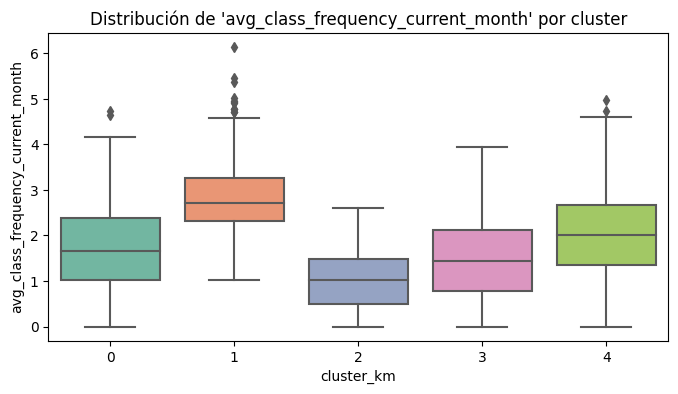

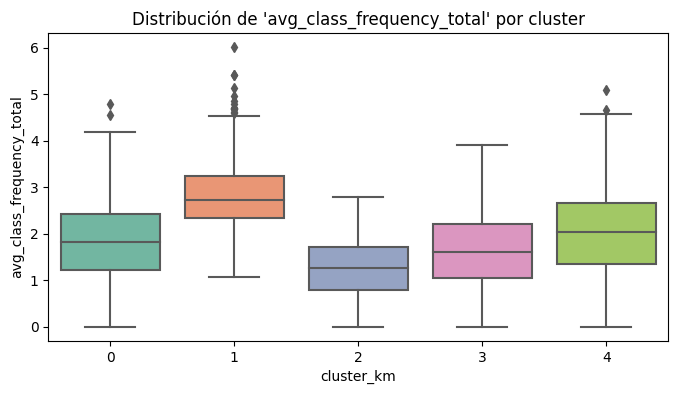

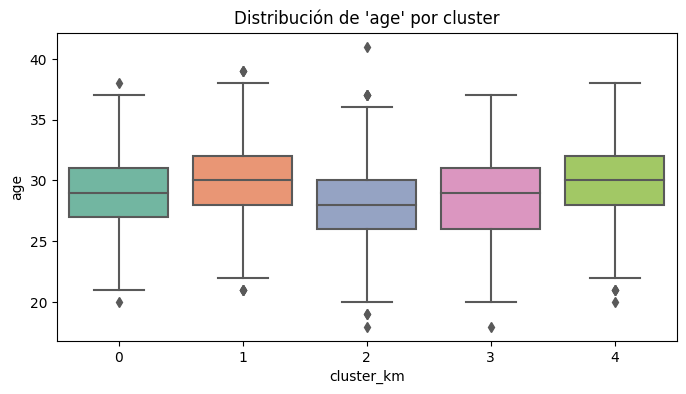

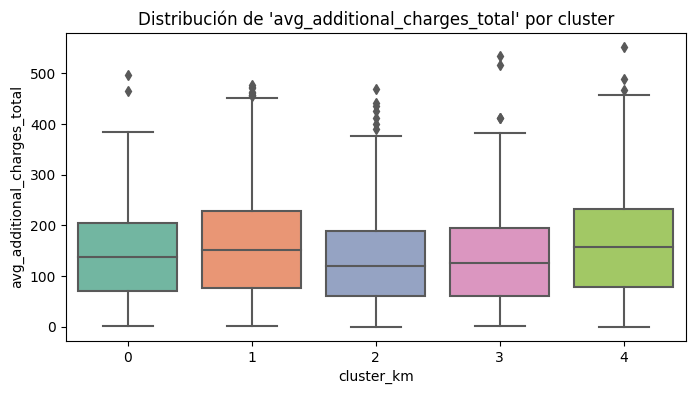

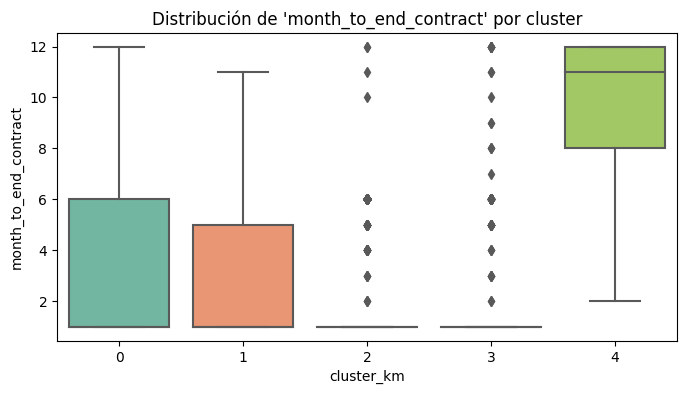

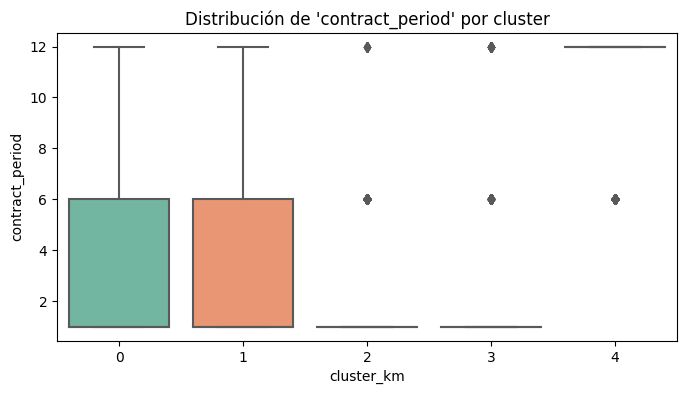

In [14]:
#Valores medios.
display(df_cluster_labels)

# Características.
features = ['avg_class_frequency_current_month', 'avg_class_frequency_total', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'contract_period']

for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='cluster_km', y=col, palette='Set2')
    plt.title(f"Distribución de '{col}' por cluster")
    plt.show()

Los dos grupos de usuarios más propensos a irse son los grupos `2` y `3`. Su perfil típico incluye números bajos de visitas semanales en el mes de los datos y en general, así como un tiempo en meses total menor que el de los demás grupos. Además son los usuarios que menos cargos adicionales tuvieron y son los más jóvenes. El periodo de su contrato es corto y no demuestran tanto interés en sesiones grupales. 

El _cluster_ número `0` no tiene un _churn_ promedio tan alto, pero sigue siendo un grupo en el que la compañía concentrarse. Comparte las características de los promedios de los _clusters_ anteriores, pero sin números tan altos.

Los _clusteres_ `1` y `4` son los de los clientes más leales. Su perfil típico incluye usuarios con un buen número de visitas grupales, las cantidades más grandes de cargos extras, las permanencias en meses más altas y las frecuencias de visitas más grandes. Se trata de usuarios que disfrutan de visitar frecuentemente el gimnasio, en edad son de los más grandes y muchos de ellos, especialmente los del grupo `2`, trabajan en compañías que les ofrecen descuentos por la suscripción y han aprovechado ser referidos por amigos. 

Veamos qué tanto cambia su __tasa de abandono__.

In [13]:
# Tasa de abandono.
df_cluster_labels = (
    df.groupby('cluster_km')
      .mean()
      .assign(churn_rate=lambda x: x['churn'] * 100)
      .sort_values(by='churn_rate', ascending=False)
).reset_index()

# Impresión de la tasa de abandono.
print(df_cluster_labels[['cluster_km', 'churn_rate']])


   cluster_km  churn_rate
0           2   51.890587
1           3   44.181460
2           0   26.683938
3           1    7.184923
4           4    2.758621


Las tasas de abandono varían muchísimo entre _clusters_, pero esto podría ser bueno. La compañía tiene grupos de usuarios leales y grupos poco leales __bien definidos__. Un estudio y comprensión profundas de los usuarios más leales y sus características les permitirá entender en que variables concentrarse para que los tipos de usuarios que más cancelan adopten las conductas ideales.

## Conclusiones y recomendaciones finales
Nuestro análisis demuestra que algunas de las variables más influyentes en el abandono son la antigüedad del cliente, la frecuencia visitar recientes e históricas, los gastos adicionales y la duración del contrato. 

Por ello, recomiendo centrase en cuatro puntos. 

 - __Primero:__ se debe actuar de forma preventiva cuando la actividad disminuye; se pueden establecer alertas y notificaciones en los equipos de los usuarios. Se les deben recordar los beneficios de ir al gimnasio y la necesidad de ser constantes.


 - __Segundo:__ se debe hacer que los clientes nuevos formen parte de un plan estructurado con acompañamiento para una experiencia sin fricciones; los usuarios nuevos deben asistir con frecuencia por los primeros meses para desarrollar constancia y una rutina. 
 


 - __Tercero:__ la compañía debería ponerse en contacto con los usuarios antes del fin de contrato para ofrecer opciones flexibles o beneficios por compromiso. Se debe fomentar la suscripción más larga; esto se podría lograr mediante descuentos en las suscripciones. 



 -  __Cuarto:__, se debería ofrecer a los clientes comprometidos programas de lealtad para que su preferencia por la marca siga allí por mucho tiempo. Los clientes comprometidos son los que más gastan y su aporte no debería descuidarse.

De manera general, recomiendo que la compañía sea proactiva cuando identifique conductas propias de abandono y que se concentre en que los nuevos clientes desarrollen las conductas de los clientes más leales. Además de cuidar de sus clientes más valiosos.